In [1]:
import yaml
import pandas as pd
import json
import codecs
import matplotlib.pyplot as plt
import numpy as np
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord
plt.style.use('dark_background')

In [5]:
file = "/home/users/l/lacave/PhD/Analysis/SourceSensitivitySST1M/catalog/LHAASO.csv"
data = pd.read_csv(file)

In [6]:
sens_file = '/home/users/l/lacave/PhD/Analysis/SourceSensitivity/flux_sensitivity_stereo.h5'
with pd.HDFStore(sens_file) as f:
    # print(f.sensitivity)
    SST1M_Sensitivity = f.sensitivity["flux_sensitivity"]
    SST1M_Energy = f.sensitivity["energy"]
    mean_sens = np.mean(f.sensitivity["energy"])
# print(SST1M_Energy)

1LHAASO J1809-1918u
1LHAASO J1814-1636u
1LHAASO J1825-1337u
1LHAASO J1837-0654u


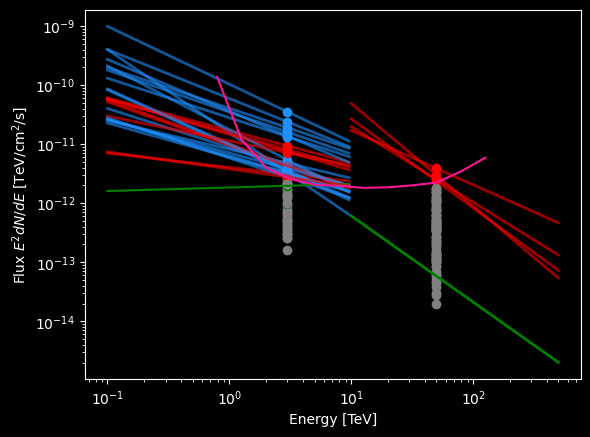

In [7]:
s_both = []
for i, s in data.iterrows():
    if s['components'] != 'WCDA':
        s_both.append(s['Source name'])
        emin=10
        emax=500
        E = np.arange(emin, emax, 0.5)
        e2dnde = 50**2 * s['N0'] * 1e-16
        if e2dnde > SST1M_Sensitivity[13]:
            plt.scatter(50, e2dnde, label=s['Assoc.(Sep.)'], color='r')
            plt.plot(E, E**2 *s['N0'] * 1e-16 * (E/50)**-s['index'], color='r', alpha=0.6, lw=2)
            print(s['Source name'])
        else:
            plt.scatter(50, e2dnde, label=s['Assoc.(Sep.)'], color='gray')
        if s['Source name'] == "1LHAASO J2018+3643u":
            plt.scatter(3, e2dnde, label=s['Source name'], color='g')#Assoc.(Sep.)
            plt.plot(E, E**2 *s['N0'] * 1e-13 * (E/3)**-s['index'], color='g', lw=2)
    else:
        if s['Source name'] in s_both:
            c = "r"
        else:
            c='dodgerblue'
        emin=0.1
        emax=10
        E = np.arange(emin, emax, 0.5)
        e2dnde = 3**2 * s['N0'] * 1e-13
        if e2dnde > SST1M_Sensitivity[7]:
            plt.scatter(3, e2dnde, label=s['Source name'], color=c)#Assoc.(Sep.)
            plt.plot(E, E**2 *s['N0'] * 1e-13 * (E/3)**-s['index'], color=c, alpha=0.6, lw=2)
        else:
            plt.scatter(3, e2dnde, label=s['Source name'], color='gray')#Assoc.(Sep.)
        if s['Source name'] == "1LHAASO J2018+3643u":
            plt.scatter(3, e2dnde, label=s['Source name'], color='g')#Assoc.(Sep.)
            plt.plot(E, E**2 *s['N0'] * 1e-13 * (E/3)**-s['index'], color='g')
        
    # plt.errorbar(7, s['flux measurements'][0]['flux']*7**2, yerr=s['flux measurements'][0]['flux uncertainty up']*7**2)
plt.xscale('log')
plt.yscale('log')
plt.plot(SST1M_Energy, SST1M_Sensitivity, label="SST1M Stereo Sensitivity 5$\sigma$ in 50h", color='deeppink')
# plt.legend(prop={'size': 8})
plt.xlabel('Energy [TeV]')
plt.ylabel('Flux $E^2dN/dE$ [TeV/cm$^2$/s]')
plt.show()
    # print(s['name'])

Text(0.5, 1.0, 'LHAASO Catalog')

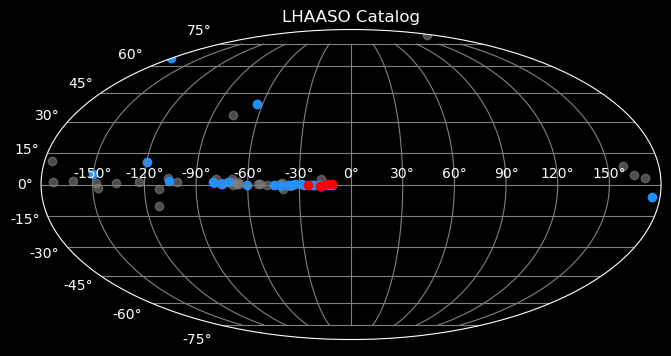

In [21]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.grid(color='gray')
for i, s in data.iterrows():
    if s['components'] == 'WCDA':
        e2dnde = 3**2 * s['N0'] * 1e-13
        if (e2dnde > SST1M_Sensitivity[7]):
            c_icrs = SkyCoord(ra=s['Ra']*u.degree, dec=s['Dec']*u.degree, frame='icrs')
            # ax.scatter(c_icrs.ra.rad, c_icrs.dec.rad, color='b')
            ax.scatter(-c_icrs.galactic.l.wrap_at('180d').radian, c_icrs.galactic.b.wrap_at('180d').radian, color='dodgerblue')
        else:
            c_icrs = SkyCoord(ra=s['Ra']*u.degree, dec=s['Dec']*u.degree, frame='icrs')
            ax.scatter(-c_icrs.galactic.l.wrap_at('180d').radian, c_icrs.galactic.b.wrap_at('180d').radian, color='gray', alpha=0.6, zorder=0)
    else:
        e2dnde = 50**2 * s['N0'] * 1e-16
        if (e2dnde > SST1M_Sensitivity[13]):
            c_icrs = SkyCoord(ra=s['Ra']*u.degree, dec=s['Dec']*u.degree, frame='icrs')
            # ax.scatter(c_icrs.ra.rad, c_icrs.dec.rad, color='b')
            ax.scatter(-c_icrs.galactic.l.wrap_at('180d').radian, c_icrs.galactic.b.wrap_at('180d').radian, color='red', zorder=3)
        # else:
        #     c_icrs = SkyCoord(ra=s['Ra']*u.degree, dec=s['Dec']*u.degree, frame='icrs')
        #     ax.scatter(-c_icrs.galactic.l.wrap_at('180d').radian, c_icrs.galactic.b.wrap_at('180d').radian, color='gray', alpha=0.6, zorder=0)
plt.title("LHAASO Catalog")

In [ ]:
df = pd.DataFrame()
name=[]
ra=[]
dec=[]
weight=[]
flux=[]
flux_at=[]
other=[]
integrated_flux=[]
r=[]
emin=1
emax=50
E_WCDA = np.arange(0.1, 10.1, 0.1)
E_KM2A = np.arange(50, 1000, 0.5)
for i, s in data.iterrows():
    if s['components'] == 'WCDA':
        e2dnde = 3**2 * s['N0'] * 1e-13
        integral_WCDA = np.sum(s['N0'] * 1e-13 * (E_WCDA/3)**-s['index'])*0.5
        if (e2dnde > SST1M_Sensitivity[7]):
            name.append(s['Source name'])
            ra.append(s['Ra'])
            dec.append(s['Dec'])
            weight.append(1)
            flux.append(e2dnde)
            r.append(s['r39'])
            flux_at.append(3)
            integrated_flux.append(integral_WCDA)
            other.append(s['Assoc.(Sep.)'])
df['name'] = name
df['ra'] = ra
df['dec'] = dec
df['weight'] = weight
df['other'] = other
df['flux'] = flux
df['flux_at'] = flux_at
df['integrated_flux'] = integrated_flux
df['r39'] = r
df.to_csv('/home/users/l/lacave/PhD/Analysis/SourceSensitivity/HAWC_Catalog/LHAASO_SST1M.csv', index=None)